# Assembly Completeness Analysis for Aedes Genome Assembly

This Jupyter Notebook is dedicated to the analysis of assembly completeness of genomes of organisms. The main objective is to visualize and compare the assembly completeness in different datasets using a bar chart.

## Libraries Used
The notebook uses the following Python libraries for data analysis and visualization:
- Pandas for tabular data manipulation.
- Matplotlib and Seaborn for creating charts.
- NumPy for mathematical operations.
- Os for file and directory management.
- Json for loading JSON files.

## Initial Configurations
Before proceeding with the analysis, some initial configurations have been made, including setting the format for inline chart display and specifying the filename for saving the chart.

- Chart filename: filename
- Organism under examination: organism
- Destination folder path for charts: path

## Data Loading
The data required for analysis is contained in JSON files, and these data are loaded and analyzed in the notebook. The paths to JSON files were obtained by iterating through directories within the specified path.


In [34]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import json

%matplotlib inline

# Insert the filename of the graph
filename = "BUSCO_results"

# Insert the name of the database (if you are using single databases on a multiple organism)
database = "Chlorophyta"

# Insert the name of the organism (if you are using single organisms on a multiple database)
organism = "Aedes Zammitii - polished"

# Insert the path to input data
in_path = './busco_tmp-2/'

# Insert the path to output data
out_path = './results/'

json_file_paths = []

for dir in os.listdir(in_path): # Numero di data
    if os.path.isdir(in_path + dir):

        print([str(in_path + dir + '/' + x) for x in os.listdir(in_path + dir) if x.endswith('.json')])

        json_file_paths = json_file_paths + [str(in_path + dir + '/' + x) for x in os.listdir(in_path + dir) if x.endswith('.json')]

# Loadin json files
json_files = []

for file in json_file_paths:
    with open(file, "r") as f:
        json_files.append(json.load(f))
        f.close()

['./busco_tmp-2/arthropoda/short_summary.specific.arthropoda_odb10.arthropoda_busco_out.json']
['./busco_tmp-2/metazoa/short_summary.specific.metazoa_odb10.metazoa_busco_out.json']
['./busco_tmp-2/insecta/short_summary.specific.insecta_odb10.insecta_busco_out.json']
['./busco_tmp-2/diptera/short_summary.specific.diptera_odb10.diptera_busco_out.json']
['./busco_tmp-2/eukaryota/short_summary.specific.eukaryota_odb10.eukaryota_busco_out.json']


## Multiple Organism - Single database

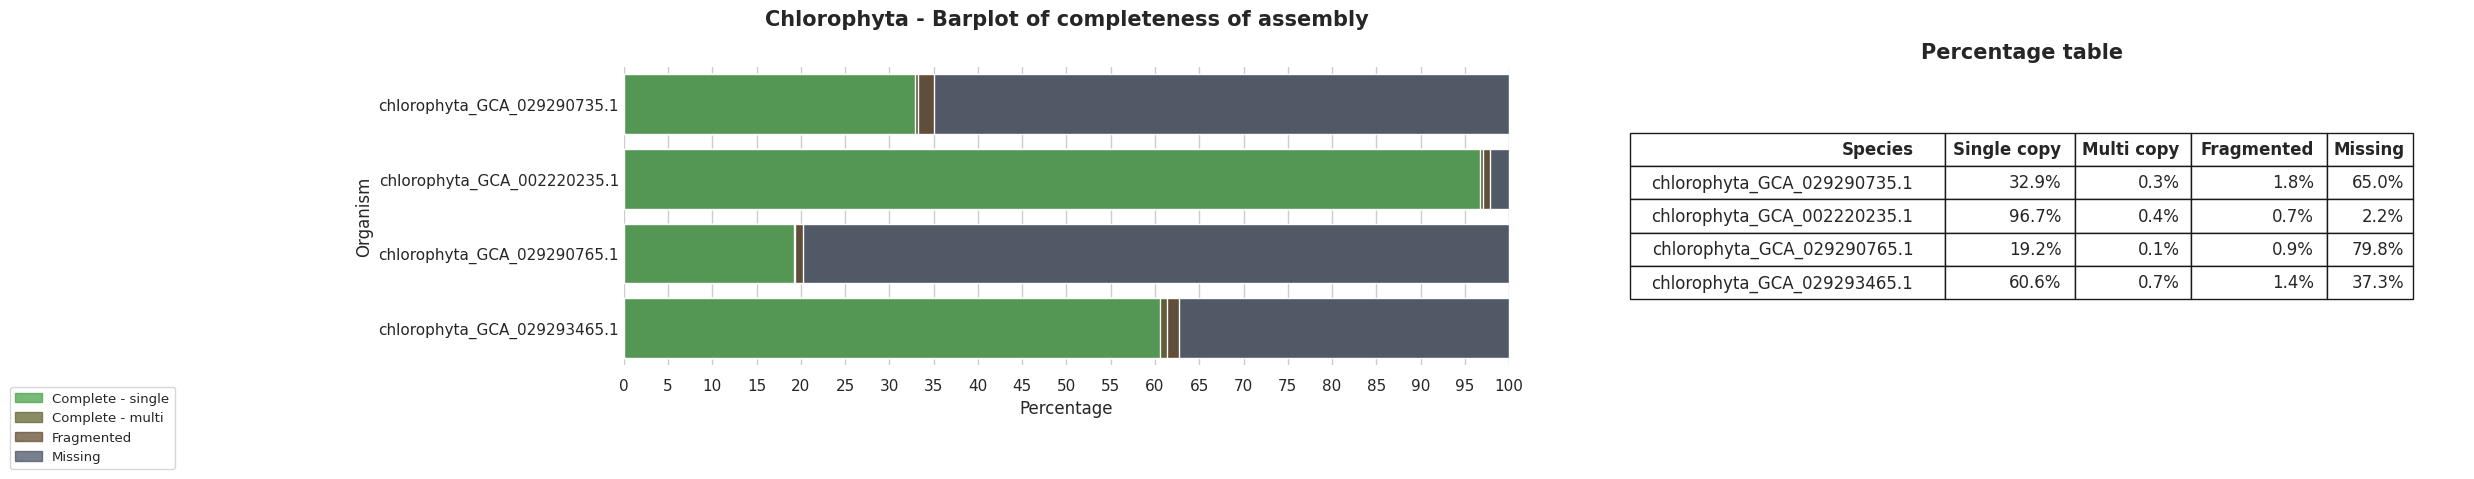

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
import numpy as np
import os
from matplotlib.patches import Patch

# Impostazione dello stile di Seaborn
sns.set(style="whitegrid")
colori = ['#49a34b', '#636633', '#664f33', '#4b5669']
species_names = [x for x in os.listdir(in_path)]
labels = ['Complete - single', 'Complete - multi', 'Fragmented', 'Missing']
busco_labels = ['Single copy', 'Multi copy', 'Fragmented', 'Missing']

# Creazione del grafico
fig, axs = plt.subplots(figsize=(25, len(species_names)+1), ncols=2, nrows=1)

# Creazione della matrice dei valori
values_matrix = np.array([])
for label in busco_labels:
    if values_matrix.size != 0:
        values_matrix = np.vstack([values_matrix, values_matrix[-1] + [file['results'][label] for file in json_files]])
    else:
        values_matrix = np.array([file['results'][label] for file in json_files], ndmin=2)

# Creazione delle singole barre con colori diversi
for idx, label in enumerate(labels):
    sns.barplot(x=values_matrix[-idx-1], color=colori[-idx-1], y=species_names, ax=axs[0], errorbar=None, alpha=0.99)
    
axs[0].xaxis.set_major_locator(ticker.MultipleLocator(5))
# Personalizzazione dell'asse x, y e degli spazi dei ticks
axs[0].set_xlabel('Percentage', fontsize=12)
axs[0].set_ylabel('Organism', fontsize=12)
axs[0].set_title(database + ' - Barplot of completeness of assembly', fontsize=15, weight='bold', pad=30)

# Set the x-axis limits
axs[0].set_xlim(0, 100)

# Rimozione dei bordi del grafico
sns.despine(top=True, right=True, left=True, bottom=True)

# Rimozione dei ticks dell'asse y
axs[0].tick_params(axis='y', length=0)

# Legenda
patches_list = [Patch(color=colori[i], label=labels[i], alpha=0.75) for i in range(len(labels))]
axs[0].legend(handles=patches_list, bbox_to_anchor=(-0.5, -0.05), fontsize=9.5)


plt.tight_layout()

table_data = [["Species"] + busco_labels]

for file, species in zip(json_files, species_names):
    table_data.append([species] + [str(file['results'][label]) + '%' for label in busco_labels])

table = axs[1].table(cellText=table_data, loc='center')

table.set_fontsize(34)
table.scale(1, 2)
table.auto_set_column_width(col=list(range(len(table_data[0]))))
axs[1].set_title("Percentage table", weight='bold', size=15)

from matplotlib.font_manager import FontProperties

for (row, col), cell in table.get_celld().items():
  if (row == 0) or (col == -1):
    cell.set_text_props(fontproperties=FontProperties(weight='bold'))
    
axs[1].axis('off')

plt.savefig(out_path + filename + '_completeness.png', bbox_inches='tight', dpi=300)

plt.show()

## Bar Chart Creation
The bar chart is created to visualize the assembly completeness in different datasets. Three different colors have been used to represent three completeness categories: "Complete," "Fragmented," and "Missing."

The chart features include:
- Y-axis labels for dataset names.
- X-axis representing the percentage of completeness.
- Colored bars representing completeness in different categories.
- Legend identifying the categories.
- Chart title including the name of the organism under examination.

## Customization and Saving
The chart is customized for better readability and appearance. Borders of the chart and y-axis ticks have been removed for better presentation. Finally, the chart is saved as a PNG file in the specified folder.

This notebook provides a detailed overview of the assembly completeness analysis for organisms' genomes and allows for the generation of an informative chart for data visualization.

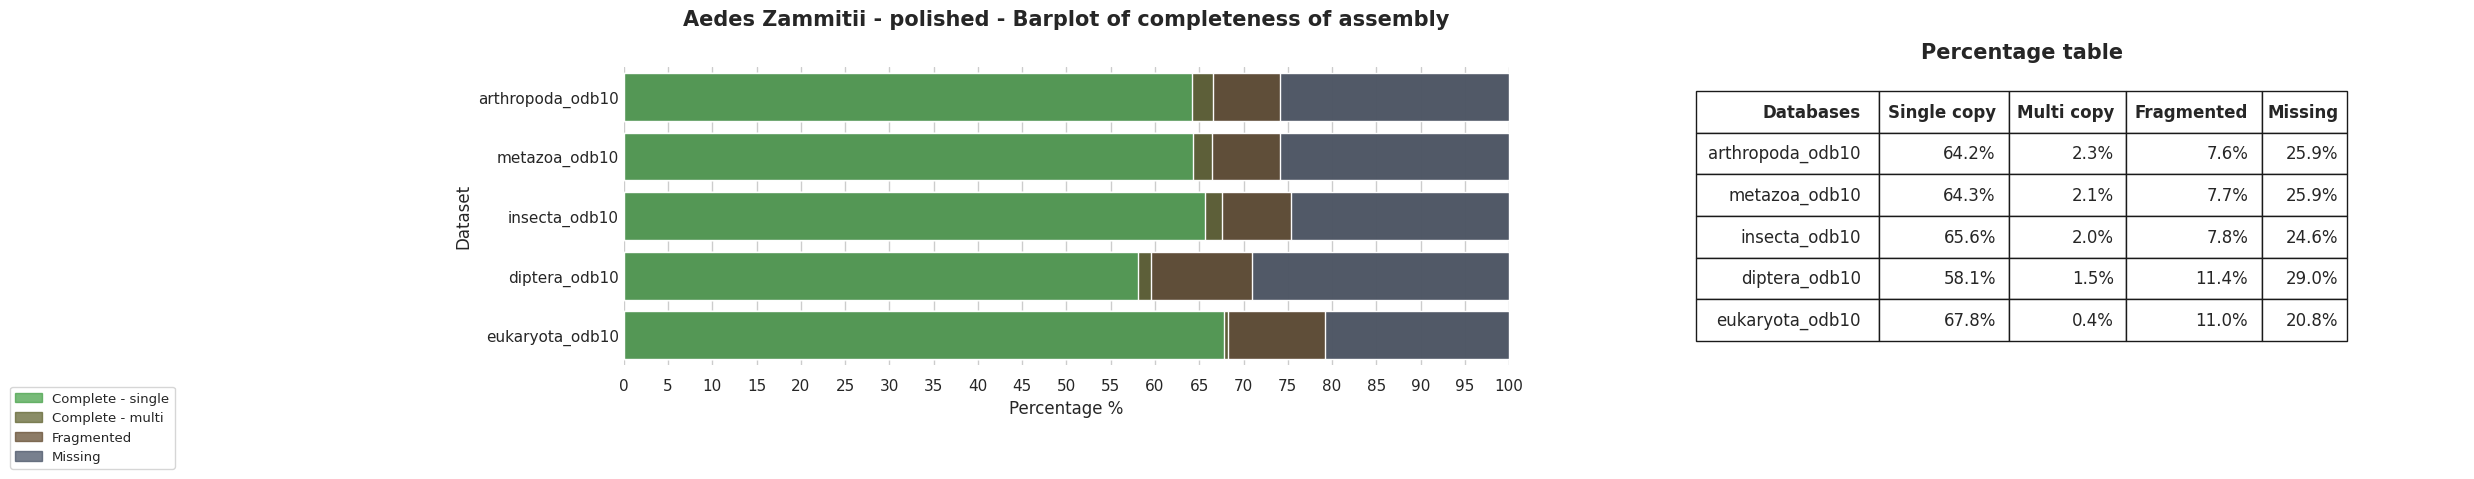

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
from matplotlib.patches import Patch

# Impostazione dello stile di Seaborn
sns.set(style="whitegrid")
colori = ['#49a34b', '#636633', '#664f33', '#4b5669']
db_names = [x['lineage_dataset']['name'] for x in json_files]
labels = ['Complete - single', 'Complete - multi', 'Fragmented', 'Missing']
busco_labels = ['Single copy', 'Multi copy', 'Fragmented', 'Missing']

# Creazione del grafico
fig, axs = plt.subplots(figsize=(25, len(db_names)), ncols=2, nrows=1)

# Creazione della matrice dei valori
values_matrix = np.array([])
for label in busco_labels:
    if values_matrix.size != 0:
        values_matrix = np.vstack([values_matrix, values_matrix[-1] + [file['results'][label] for file in json_files]])
    else:
        values_matrix = np.array([file['results'][label] for file in json_files], ndmin=2)

#########################################################################################################

# Creazione delle singole barre con colori diversi
for idx, label in enumerate(labels):
    sns.barplot(x=values_matrix[-idx-1], color=colori[-idx-1], y=db_names, ax=axs[0], errorbar=None, alpha=0.99)
    
axs[0].xaxis.set_major_locator(ticker.MultipleLocator(5))
# Personalizzazione dell'asse x, y e degli spazi dei ticks
axs[0].set_xlabel('Percentage %', fontsize=12)
axs[0].set_ylabel('Dataset', fontsize=12)
axs[0].set_title(organism + ' - Barplot of completeness of assembly', fontsize=15, weight='bold', pad=30)

# Set the x-axis limits
axs[0].set_xlim(0, 100)

# Rimozione dei bordilist(h[-1]) del grafico
sns.despine(top=True, right=True, left=True, bottom=True)

# Rimozione dei ticks dell'asse y
axs[0].tick_params(axis='y', length=0)

# Legenda
patches_list = [Patch(color=colori[i], label=labels[i], alpha=0.75) for i in range(len(labels))]
axs[0].legend(handles=patches_list, bbox_to_anchor=(-0.5, -0.05), fontsize="9.5")

plt.tight_layout()

table_data = [["Databases"] + busco_labels]

for file, db in zip(json_files, db_names):
    table_data.append([db] + [str(file['results'][label]) + '%' for label in busco_labels])

table = axs[1].table(cellText=table_data, loc='center')

table.set_fontsize(35)
table.scale(1, 2.5)
table.auto_set_column_width(col=list(range(len(table_data[0]))))
axs[1].set_title("Percentage table", weight='bold', size=15)

from matplotlib.font_manager import FontProperties

for (row, col), cell in table.get_celld().items():
  if (row == 0) or (col == -1):
    cell.set_text_props(fontproperties=FontProperties(weight='bold'))
    
axs[1].axis('off')

plt.savefig(out_path + filename + '_completeness.png', bbox_inches = 'tight', dpi=300)

plt.show()